<a href="https://colab.research.google.com/github/wstupello/Financial-Studies/blob/main/Case_study_of_the_correlation_of_assets_in_the_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case study of the correlation of assets in the portfolio

In [3]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [6]:
#Assets to be analyzed

FII = ['BRCO11.SA', 'BRCR11.SA', 'BTAL11.SA', 'BTLG11.SA', 'CPTS11.SA', 'DEVA11.SA', 'KNSC11.SA', 'RBRR11.SA', 'VISC11.SA', 'XPML11.SA']
AST = ['ALOS3.SA', 'BBDC4.SA', 'BRAP4.SA', 'BRSR6.SA', 'ISAE4.SA', 'TRPL4.SA', 'JSLG3.SA', 'MILS3.SA', 'MLAS3.SA', 'POSI3.SA', 'SIMH3.SA',
        'TASA4.SA', 'TUPY3.SA', 'VLID3.SA', 'VULC3.SA', 'WIZC3.SA']
IND = ['USDBRL=X', '^BVSP', '^GSPC', 'EURBRL=X']

In [7]:
FII2 = yf.download(FII, start = '2022-01-01')['Adj Close']
AST2 = yf.download(AST, start = '2022-01-01')['Adj Close']
IND2 = yf.download(IND, start = '2022-01-01')['Adj Close']

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  16 of 16 completed
[*********************100%***********************]  4 of 4 completed


In [12]:
IND2.rename(columns = {'^BVSP': 'IBOV', 'USDBRL=X':'USD/BRL', '^GSPC':'S&P 500', 'EURBRL=X':'EUR/BRL'}, inplace = True)


Merging all data

In [13]:
dfs = [FII2, AST2, IND2]
df_final = reduce(lambda left,right: pd.merge(left,right, how = "inner", on='Date'), dfs)

In [17]:
retornos = df_final.pct_change()
retornos = retornos.dropna()

<ipython-input-17-41f180007d5c>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = df_final.pct_change()


In [18]:
retornos.head()

Ticker,BRCO11.SA,BRCR11.SA,BTAL11.SA,BTLG11.SA,CPTS11.SA,DEVA11.SA,KNSC11.SA,RBRR11.SA,VISC11.SA,XPML11.SA,...,TASA4.SA,TRPL4.SA,TUPY3.SA,VLID3.SA,VULC3.SA,WIZC3.SA,EUR/BRL,USD/BRL,IBOV,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-12,0.000097,-0.011091,-0.000852,-0.001646,-0.002778,-0.023967,-0.009357,-0.019252,-0.005767,-0.007325,...,-0.004980,-0.017530,0.014256,-0.051883,0.004972,-0.013675,0.002880,0.003312,-0.001376,-0.002893
2024-11-13,0.008115,-0.007009,-0.001279,-0.006390,-0.016578,-0.021002,-0.004723,-0.005030,-0.000600,0.002719,...,-0.053053,0.002075,-0.003720,0.015403,-0.006803,0.000000,-0.005488,-0.001251,0.000282,0.000232
2024-11-14,-0.005942,-0.002588,0.006406,0.009336,0.020000,-0.001650,0.001186,0.006289,-0.000600,0.007069,...,-0.021142,0.002070,-0.074274,-0.021557,0.002491,0.003466,0.004902,0.010038,0.000454,-0.006050
2024-11-18,-0.002217,0.015570,-0.002546,-0.000932,-0.008403,0.008264,-0.005924,0.016420,0.015218,0.002037,...,-0.021598,-0.005372,-0.019274,0.015912,0.004348,0.017271,-0.003631,-0.001946,-0.000188,-0.009337
2024-11-19,0.002802,-0.000465,0.011061,0.006948,0.000000,-0.001639,0.003576,-0.005787,0.000000,0.002517,...,0.005519,-0.002077,0.000914,-0.020080,-0.014023,0.003396,-0.003681,-0.008318,0.003358,0.003964


Correlation matrix:

In [20]:
retornos.corr()

Ticker,BRCO11.SA,BRCR11.SA,BTAL11.SA,BTLG11.SA,CPTS11.SA,DEVA11.SA,KNSC11.SA,RBRR11.SA,VISC11.SA,XPML11.SA,...,TASA4.SA,TRPL4.SA,TUPY3.SA,VLID3.SA,VULC3.SA,WIZC3.SA,EUR/BRL,USD/BRL,IBOV,S&P 500
Ticker,,,,,,,,,,,,,,,,,,,,,
BRCO11.SA,1.000000,0.581382,0.090354,0.353960,0.148814,0.246346,0.140104,0.081896,0.371605,0.338338,...,0.041544,-0.020292,-0.029077,-0.347108,0.050777,0.267270,-0.158895,-0.102745,-0.041604,-0.049355
BRCR11.SA,0.581382,1.000000,0.457369,0.233028,0.125593,0.481807,0.426799,0.305217,0.332181,0.334262,...,0.141132,0.244823,0.015183,-0.144429,0.258251,0.408485,-0.278327,-0.146311,0.280737,0.186461
BTAL11.SA,0.090354,0.457369,1.000000,0.527219,0.235113,0.196531,0.204656,0.607179,0.473077,0.647709,...,0.026293,0.111671,-0.028091,0.146740,0.061006,0.066434,-0.303496,-0.175843,0.054148,0.540010
BTLG11.SA,0.353960,0.233028,0.527219,1.000000,0.389397,0.141112,0.045385,0.364521,0.604650,0.805731,...,0.022828,-0.233670,-0.129108,-0.142701,0.049862,-0.172207,-0.199833,-0.054764,-0.234237,0.116416
CPTS11.SA,0.148814,0.125593,0.235113,0.389397,1.000000,-0.029100,0.218900,0.226280,0.464445,0.439277,...,0.107398,-0.060104,0.010255,0.189859,0.278684,0.071956,-0.120650,-0.290820,0.006006,0.063061
DEVA11.SA,0.246346,0.481807,0.196531,0.141112,-0.029100,1.000000,0.226987,0.357962,0.343837,0.186131,...,-0.038475,-0.048696,-0.013333,-0.063528,-0.066437,0.120748,0.022064,0.219906,0.052598,0.055644
KNSC11.SA,0.140104,0.426799,0.204656,0.045385,0.218900,0.226987,1.000000,0.168820,0.094750,0.175429,...,0.060441,0.149126,-0.093513,-0.046513,0.322541,0.319426,0.070506,-0.098399,0.318989,-0.011249
RBRR11.SA,0.081896,0.305217,0.607179,0.364521,0.226280,0.357962,0.168820,1.000000,0.528676,0.557587,...,-0.066224,0.118076,-0.053468,0.143236,-0.085225,0.127621,-0.235722,0.170853,-0.010723,0.392930
VISC11.SA,0.371605,0.332181,0.473077,0.604650,0.464445,0.343837,0.094750,0.528676,1.000000,0.832336,...,0.006580,-0.072890,-0.006123,-0.090553,0.099811,-0.048289,-0.157736,-0.048811,-0.178813,0.248807


<Axes: xlabel='Ticker', ylabel='Ticker'>

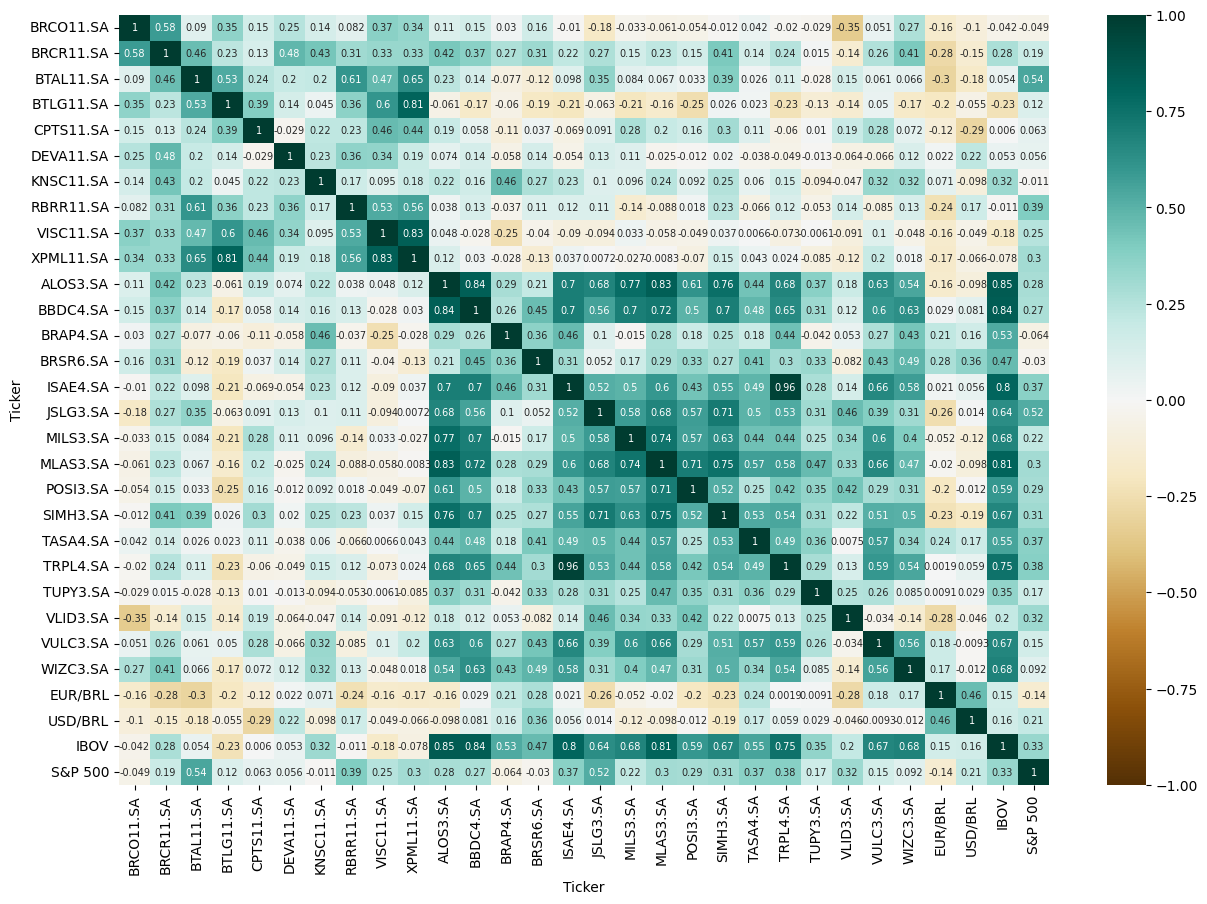

In [28]:
plt.figure(figsize = (15,10))
sns.heatmap(retornos.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG', annot_kws={'size': 7})
